데이터 로드

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.rc("font", family="Malgun Gothic")
pd.reset_option("display.max_rows")

In [2]:
df = pd.read_csv('data.csv')
df.head(2)

,name,price,description,item_condition,sale_status,likes,views,shipping_fee,image_url,location,tags,inspectable,link,update_time,brand_name,desc_len,image_count,middle_category,last_category,interest_score
0,글로니 리반 퍼자켓 카멜,230000,3번 착용했고 하자나 얼룩 없습니다!,4,1,10,133,4000,['https://media.bunjang.co.kr/product/31631544...,NaN,"글로니, 퍼자켓, 글로니퍼자켓, glowny",False,https://m.bunjang.co.kr/products/316315443,2025-06-27 18:02:26,글로니,20,2,아우터,자켓,0.07
1,글로니 terry pk long sleeve,80000,시착후 보관중입니당 pk 롱슬리브 스트라이프 블루,5,1,14,58,0,['https://media.bunjang.co.kr/product/33478587...,NaN,NaN,False,https://m.bunjang.co.kr/products/334785874,2025-06-27 18:35:00,글로니,27,2,상의,긴팔 티셔츠,0.24


In [3]:
# 칼럼 확인
df.columns

Index(['name', 'price', 'description', 'item_condition', 'sale_status',
       'likes', 'views', 'shipping_fee', 'image_url', 'location', 'tags',
       'inspectable', 'link', 'update_time', 'brand_name', 'desc_len',
       'image_count', 'middle_category', 'last_category', 'interest_score'],
      dtype='object')

기본 정보 확인

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50480 entries, 0 to 50479
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             50480 non-null  object 
 1   price            50480 non-null  int64  
 2   description      50477 non-null  object 
 3   item_condition   50480 non-null  int64  
 4   sale_status      50480 non-null  int64  
 5   likes            50480 non-null  int64  
 6   views            50480 non-null  int64  
 7   shipping_fee     50480 non-null  int64  
 8   image_url        50480 non-null  object 
 9   location         5633 non-null   object 
 10  tags             26827 non-null  object 
 11  inspectable      50480 non-null  bool   
 12  link             50480 non-null  object 
 13  update_time      50480 non-null  object 
 14  brand_name       50480 non-null  object 
 15  desc_len         50480 non-null  int64  
 16  image_count      50480 non-null  int64  
 17  middle_categ

In [5]:
# 결측값 확인
df.isnull().sum()

name                   0
price                  0
description            3
item_condition         0
sale_status            0
likes                  0
views                  0
shipping_fee           0
image_url              0
location           44847
tags               23653
inspectable            0
link                   0
update_time            0
brand_name             0
desc_len               0
image_count            0
middle_category        0
last_category          0
interest_score         0
dtype: int64

수치형 변수 통계

In [6]:
numeric_cols = ['price', 'likes', 'views', 'shipping_fee', 'desc_len',
                'image_count', 'interest_score']

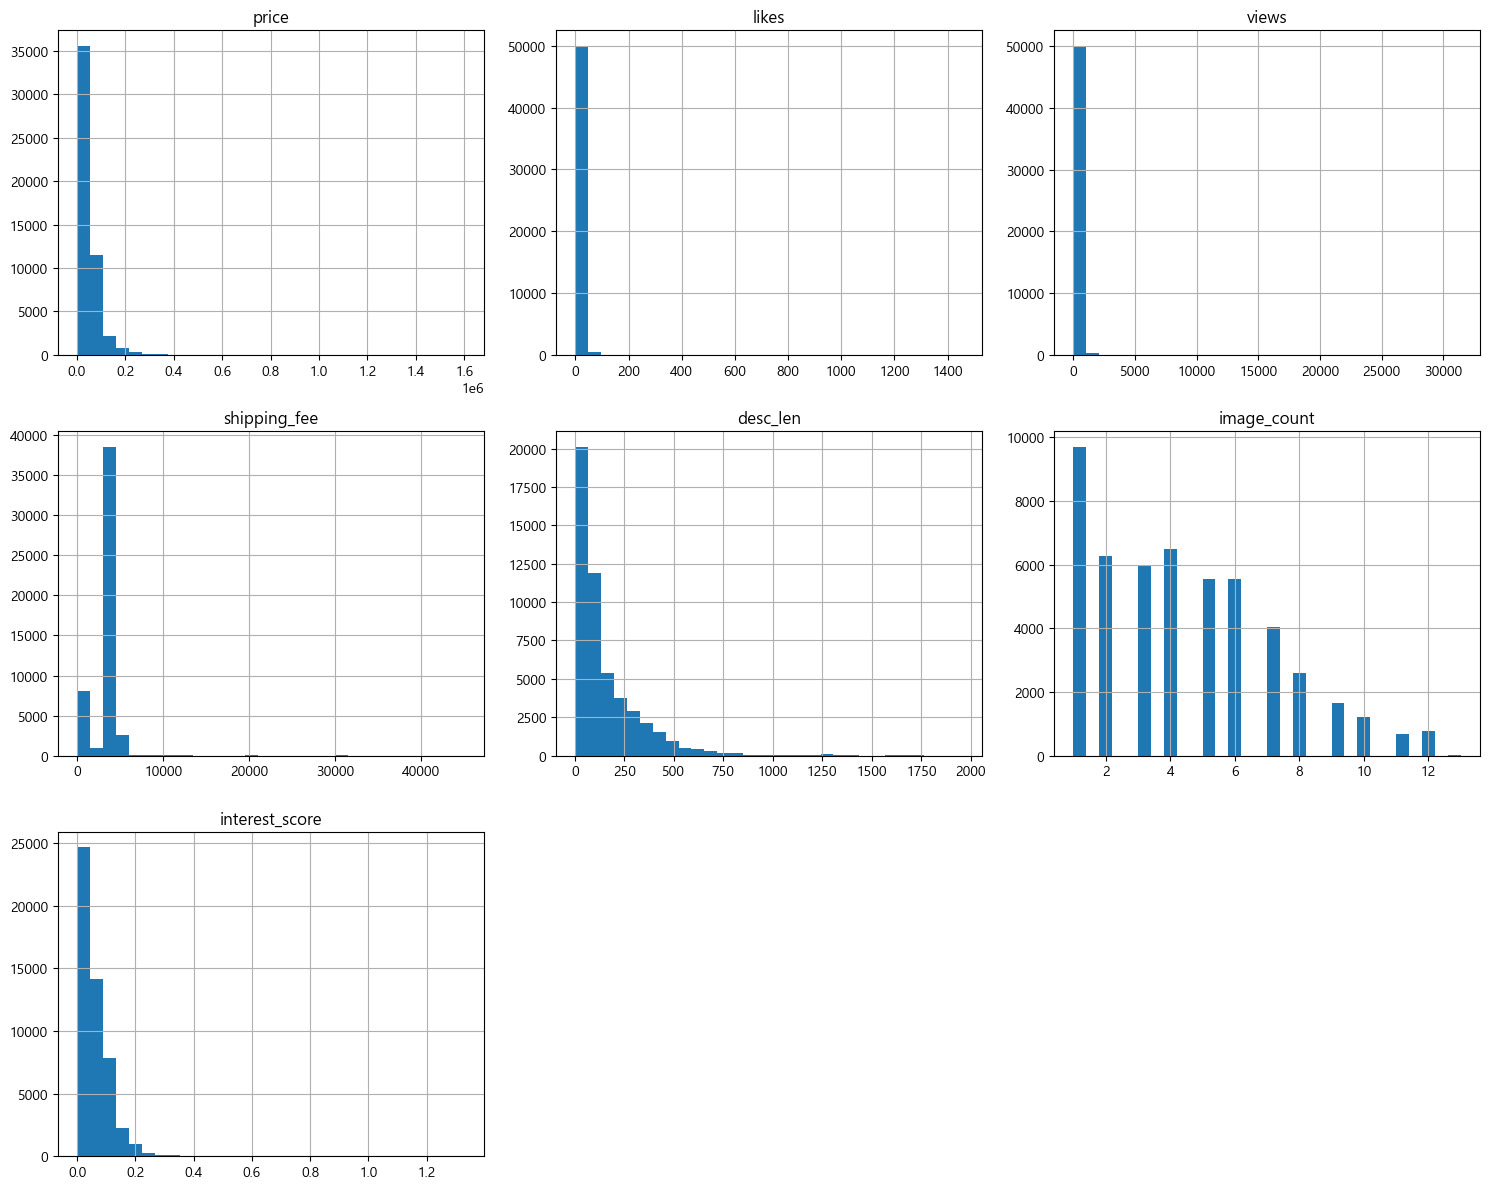

In [7]:
# 히스토그램
df[numeric_cols].hist(bins=30, figsize=(15, 12))
plt.tight_layout()
plt.show()

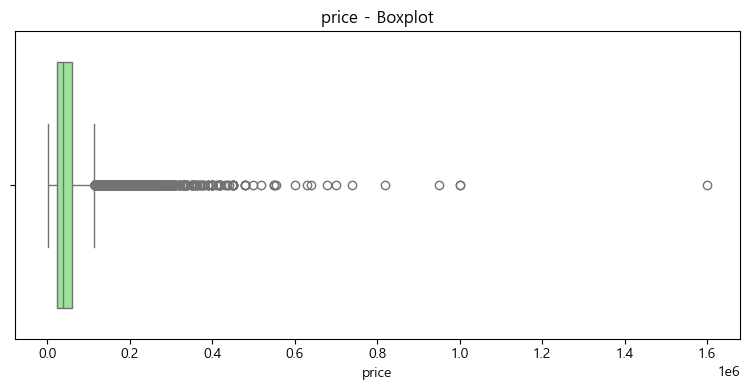

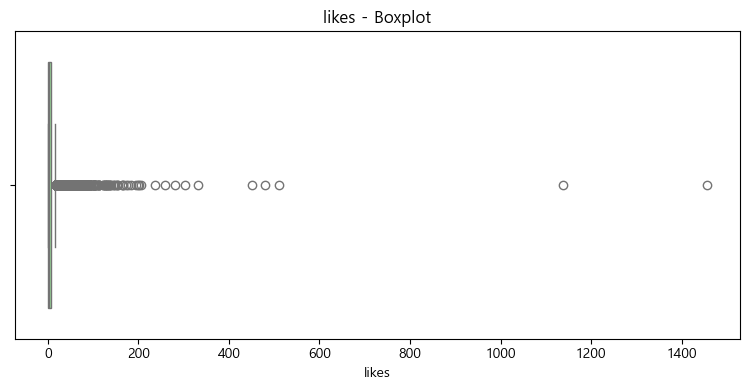

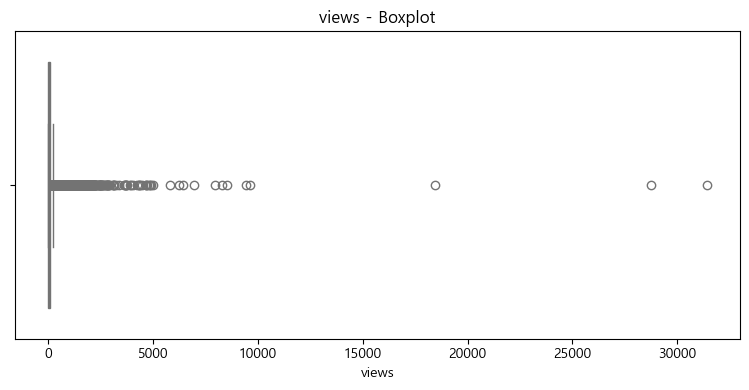

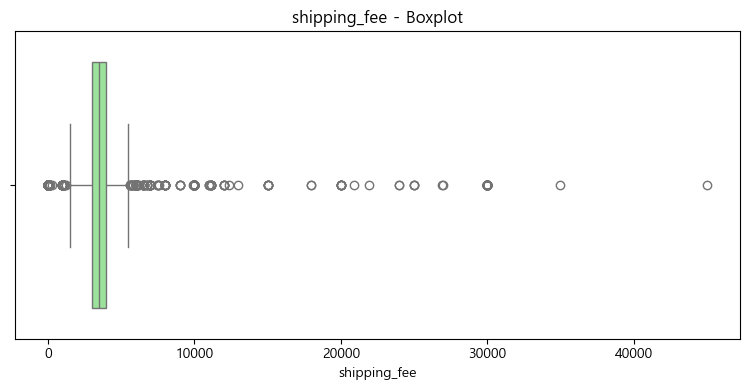

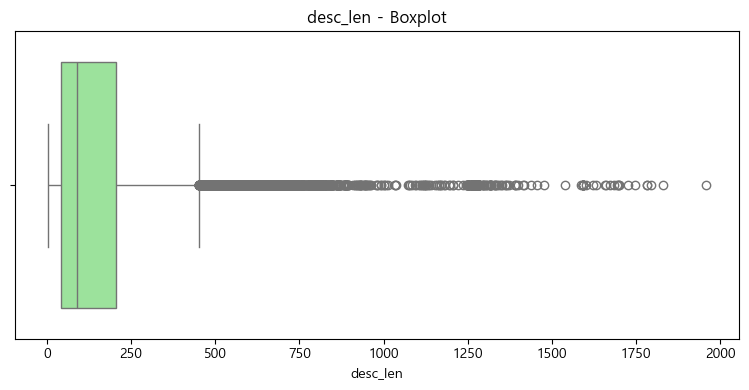

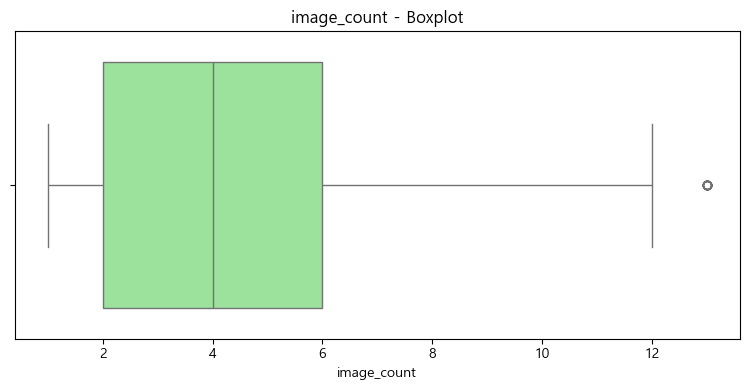

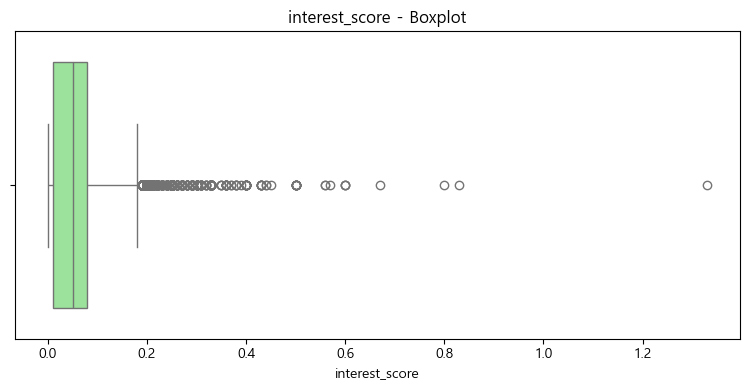

In [8]:
# 박스플랏
for col in numeric_cols:
    plt.figure(figsize=(15, 4))

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f'{col} - Boxplot')

    plt.tight_layout()
    plt.show()

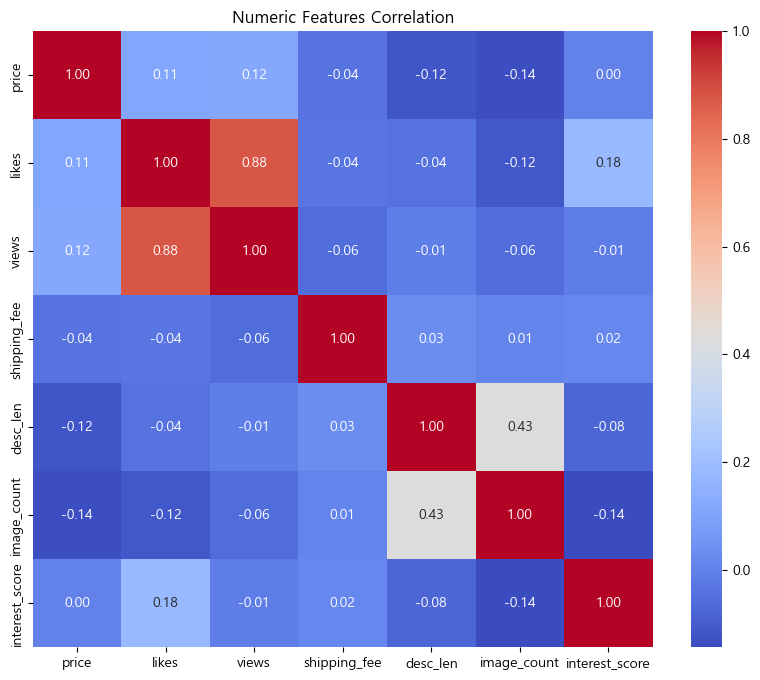

In [9]:
# 상관관계 분석
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Numeric Features Correlation')
plt.show()

범주형 변수 통계

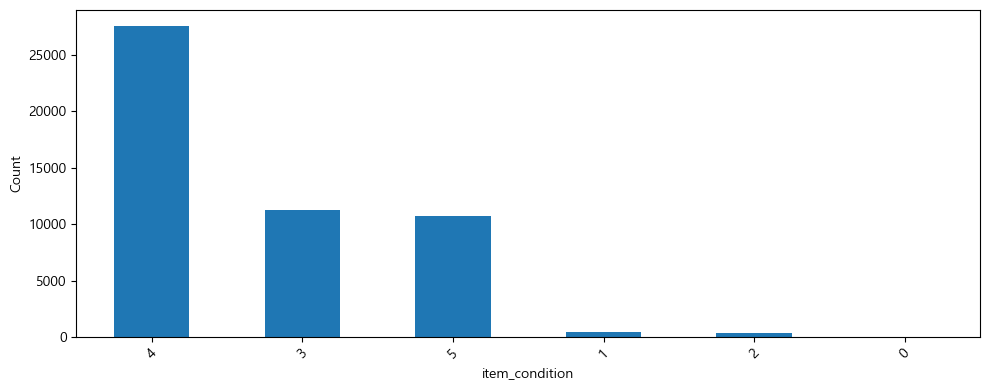

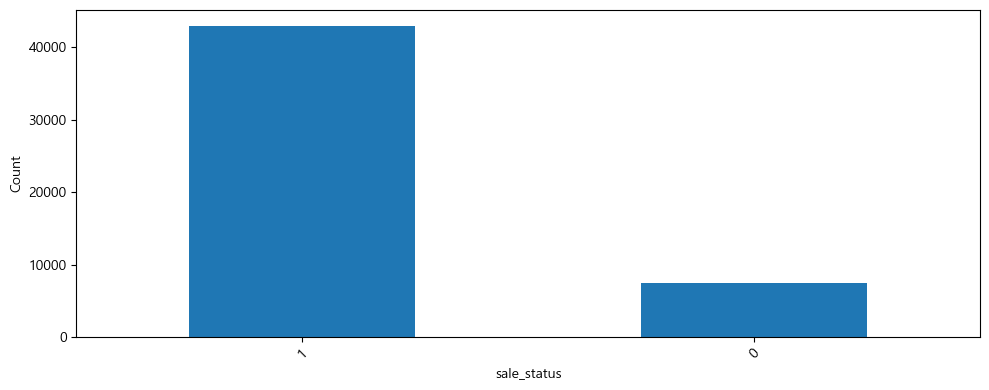

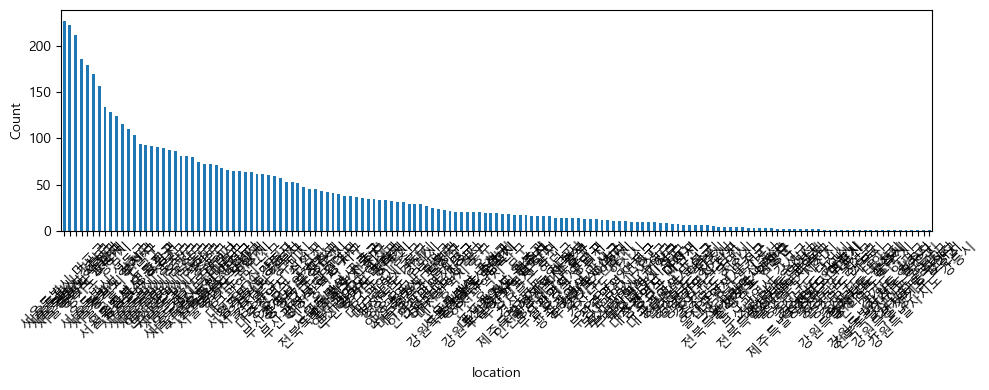

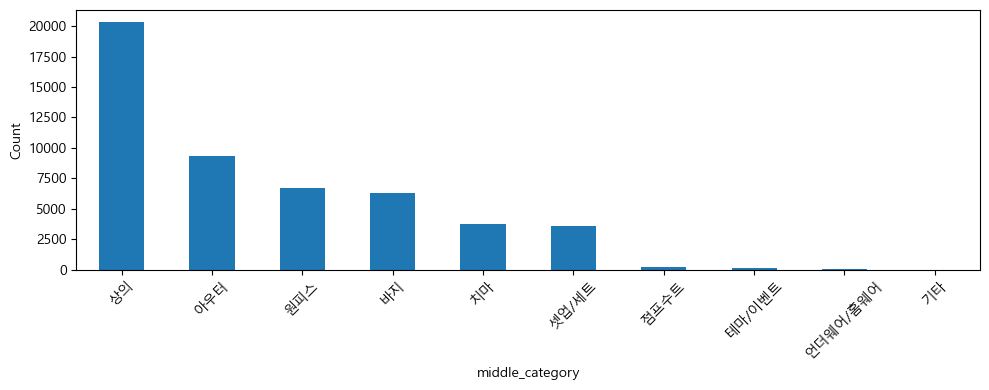

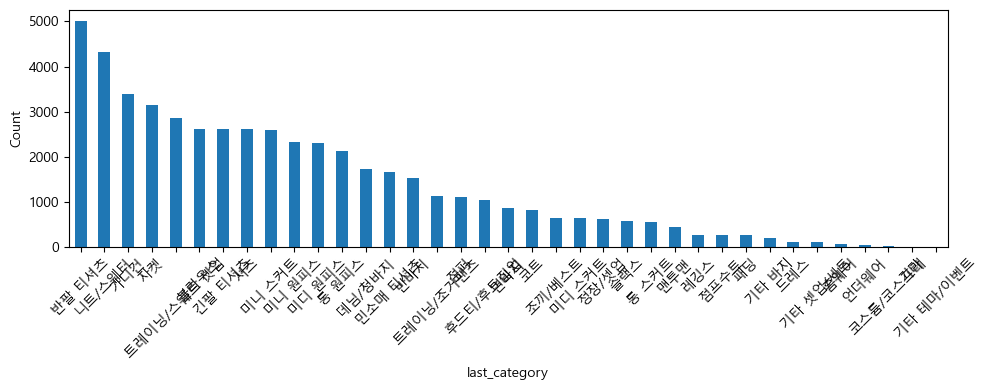

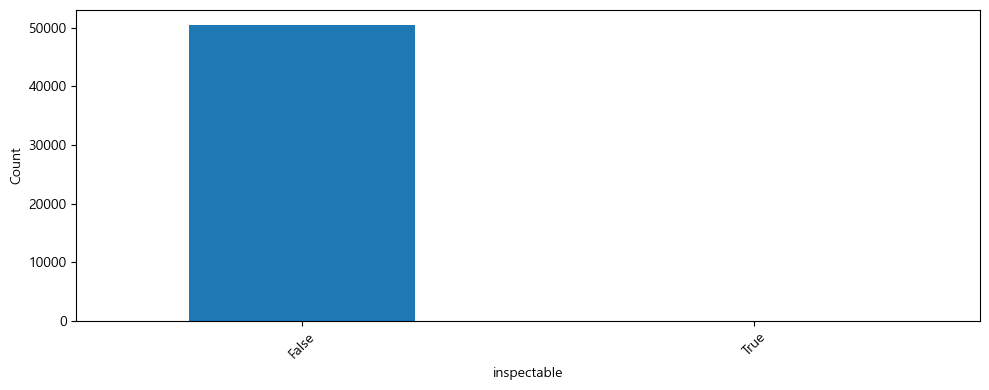

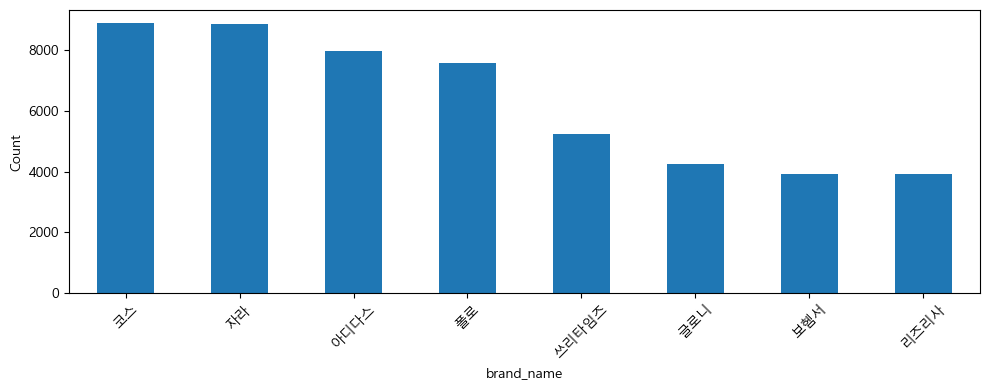

In [10]:
cat_cols = ['item_condition', 'sale_status', 'location', 'middle_category', 'last_category', 'inspectable', 'brand_name']

for col in cat_cols:
    plt.figure(figsize=(10, 4))
    df[col].value_counts().plot(kind='bar')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


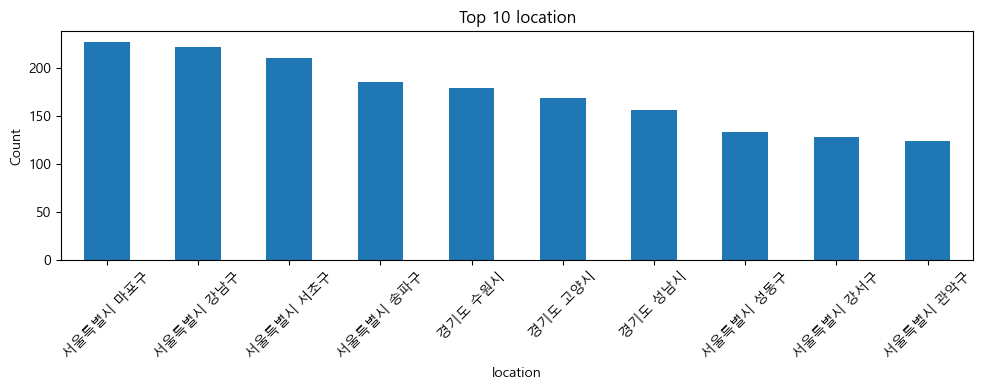

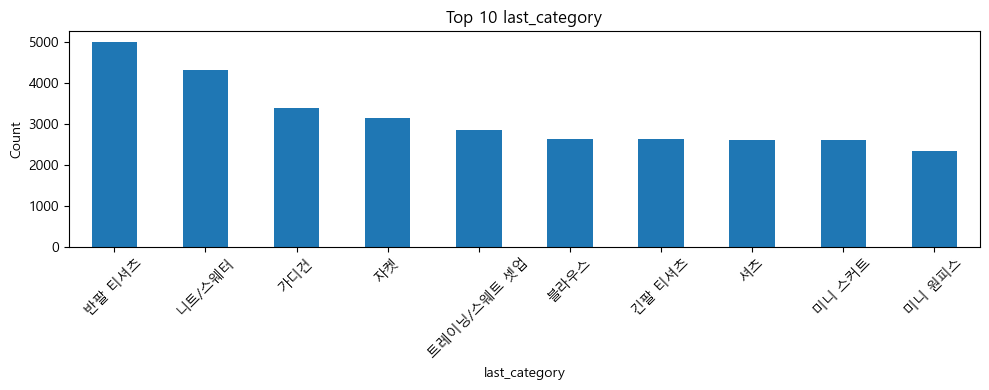

In [11]:
# 고유값이 많은 열 빈도수 상위 10개 항목 시각화
cat_cols = ['location', 'last_category']

for col in cat_cols:
    plt.figure(figsize=(10, 4))
    df[col].value_counts().head(10).plot(kind='bar')
    plt.title(f'Top 10 {col}')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


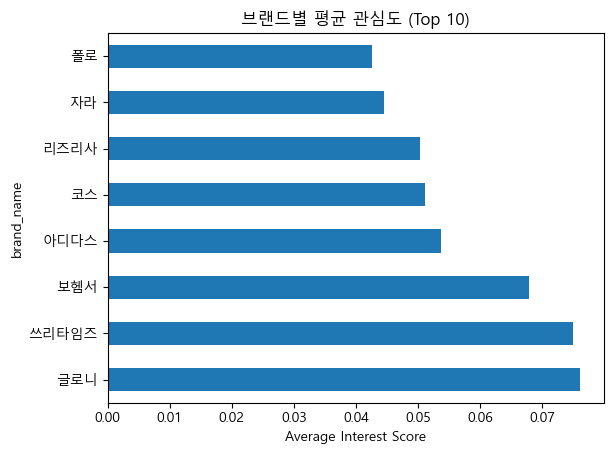

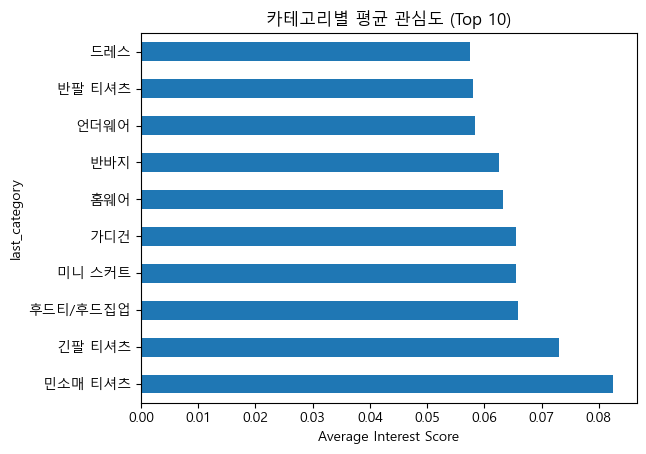

In [12]:
# 평균 관심도 높은 브랜드 Top 10
top_brands = df.groupby('brand_name')['interest_score'].mean().sort_values(ascending=False).head(10)
top_brands.plot(kind='barh', title='브랜드별 평균 관심도 (Top 10)')
plt.xlabel('Average Interest Score')
plt.show()

# 마지막 카테고리별 평균 관심도
top_cats = df.groupby('last_category')['interest_score'].mean().sort_values(ascending=False).head(10)
top_cats.plot(kind='barh', title='카테고리별 평균 관심도 (Top 10)')
plt.xlabel('Average Interest Score')
plt.show()
